In [1]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#import data
df_m = pd.read_pickle('male.pkl')
df_f = pd.read_pickle('female.pkl')
df_total =pd.read_pickle('total.pkl')

In [3]:
#conduct quick check on the dataframe
df_total.sample(5)

df_total.isnull().sum().sum()

df_total.columns

Index(['Place', 'Div/Tot', 'Number', 'Name', 'Age', 'Hometown', 'Gun Tim',
       'Net Tim', 'Pace', 'Division', 'Gun_Time', 'Net_Time', 'Net_Time1',
       'Gun_Time1', 'Gun_Net_Diff', 'Div', 'Total_Racers', 'Gender'],
      dtype='object')

In [4]:
# subset a dataframe for time analysis 
df_time = df_total[['Place','Number','Name','Age','Hometown','Pace','Net_Time1', 'Gun_Time1',
       'Gun_Net_Diff', 'Division','Gender']]

In [5]:
#create time variables 
df_time['g_hour'] = df_time['Gun_Time1'].dt.hour
df_time['g_minute'] = df_time['Gun_Time1'].dt.minute
df_time['g_second'] = df_time['Gun_Time1'].dt.second

df_time['n_hour'] = df_time['Net_Time1'].dt.hour
df_time['n_minute'] = df_time['Net_Time1'].dt.minute
df_time['n_second'] = df_time['Net_Time1'].dt.second

df_time.sample(5)

,Place,Number,Name,Age,Hometown,Pace,Net_Time1,Gun_Time1,Gun_Net_Diff,Division,Gender,g_hour,g_minute,g_second,n_hour,n_minute,n_second
366,824,3279,Josephine Bouquet,14.0,Potomac MD,10.14,1900-01-01 01:03:31,1900-01-01 01:07:22,00:03:51,14 or less,female,1,7,22,1,3,31
1170,1171,2479,Neil Small,64.0,Fairfax VA,10.37,1900-01-01 01:05:58,1900-01-01 01:09:50,00:03:52,60-69,male,1,9,50,1,5,58
132,133,216,Elmar Sulk,40.0,Bethesda MD,6.40,1900-01-01 00:41:22,1900-01-01 00:42:28,00:01:06,40-49,male,0,42,28,0,41,22
439,440,2235,Barth Rau,48.0,Clarksville MD,7.45,1900-01-01 00:48:06,1900-01-01 00:51:45,00:03:39,40-49,male,0,51,45,0,48,6
309,310,1412,David Houser,55.0,Olney MD,7.20,1900-01-01 00:45:32,1900-01-01 00:46:37,00:01:05,50-59,male,0,46,37,0,45,32


In [6]:
# Calculate time elapsed
df_time['g_total_time'] = round(((df_time['g_hour']*60)+df_time['g_minute']+(df_time['g_second']/60)),2)
df_time['n_total_time'] = round(((df_time['n_hour']*60)+df_time['n_minute']+(df_time['n_second']/60)),2)

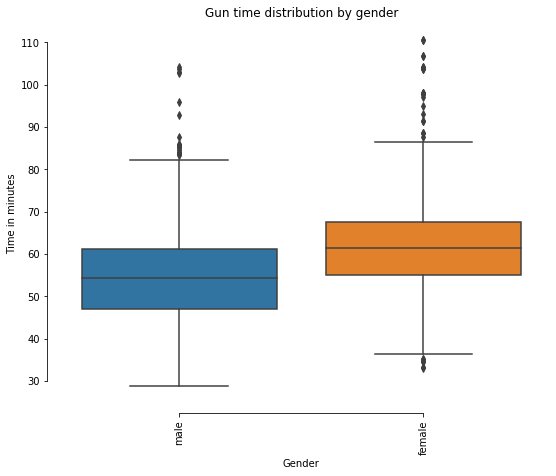

In [7]:
# Mode, range and IQR visualization of Guntime
plt.rcParams['figure.figsize'] = (8.75, 7.0)
ax = plt.axes()
plot1 = sns.boxplot(data=df_time, x='Gender', y='g_total_time')
ax.set_title("Gun time distribution by gender")
ax.set_ylabel('Time in minutes')
ax.set_xlabel('Gender')
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
plt.show()

In [8]:
# calculate IQR for males in Guntime 
round(df_time[df_time['Gender']!='female']['g_total_time'].quantile(.25),2),round(df_time[df_time['Gender']!='female']['g_total_time'].quantile(.75),2)



(47.0, 61.12)

In [9]:
# calculate median for males in Guntime 
round(df_time[df_time['Gender']!='female']['g_total_time'].quantile(.5),2)

54.3

In [10]:
# calculate mode  for males in Guntime 
df_time[df_time['Gender']!='female']['g_total_time'].value_counts(ascending=False).head()
      

55.22    5
64.93    5
60.18    4
55.90    4
63.30    4
Name: g_total_time, dtype: int64

In [11]:
# calculate mode  for males in Guntime 
df_time[df_time['Gender']=='female']['g_total_time'].value_counts(ascending=False).head()

61.78    5
62.67    5
62.70    4
63.05    4
59.02    4
Name: g_total_time, dtype: int64

In [12]:
# calculate IQR for females in Guntime 
round(df_time[df_time['Gender'] =='female']['g_total_time'].quantile(.25),2),round(df_time[df_time['Gender']=='female']['g_total_time'].quantile(.75),2)

(54.92, 67.53)

In [13]:
#minimum and maximum for Guntime for males 
round(df_time[df_time['Gender']!='female']['g_total_time'].min(),2),round(df_time[df_time['Gender']!='female']['g_total_time'].max(),2)

(28.8, 104.12)

In [14]:
#minimum and maximum for Guntime for females 
round(df_time[df_time['Gender']=='female']['g_total_time'].min(),2),round(df_time[df_time['Gender']=='female']['g_total_time'].max(),2)

(32.98, 110.52)

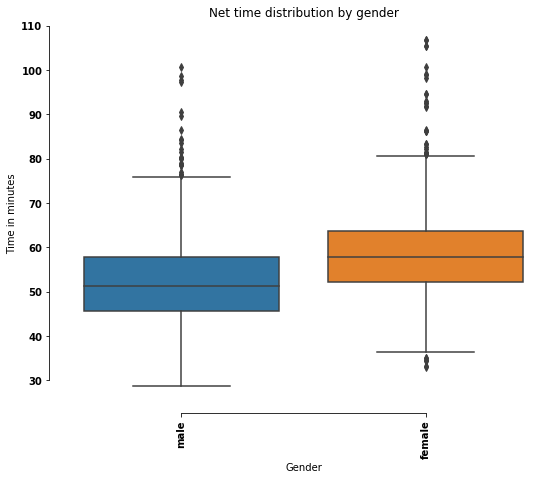

In [15]:
# Mode, range and IQR visualization of Nettime
plt.rcParams['figure.figsize'] = (8.75, 7.0)
ax = plt.axes()
plot1 = sns.boxplot(data=df_time, x='Gender', y='n_total_time')
ax.set_title("Net time distribution by gender")
ax.set_ylabel('Time in minutes')
ax.set_xlabel('Gender')
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
plt.show()

In [16]:
# IQR for females in Nettime
round(df_time[df_time['Gender'] =='female']['n_total_time'].quantile(.25),2),round(df_time[df_time['Gender']=='female']['n_total_time'].quantile(.75),2)

(52.22, 63.6)

In [17]:
# IQR for males in Nettime
round(df_time[df_time['Gender']!='female']['n_total_time'].quantile(.25),2),round(df_time[df_time['Gender']!='female']['n_total_time'].quantile(.75),2)

(45.68, 57.82)

In [18]:
# minimum and maximum for Guntime for females 
round(df_time[df_time['Gender']=='female']['n_total_time'].min(),2),round(df_time[df_time['Gender']=='female']['n_total_time'].max(),2)

(32.97, 106.82)

In [19]:
# minimum and maximum for Net Time for males 
round(df_time[df_time['Gender']!='female']['n_total_time'].min(),2),round(df_time[df_time['Gender']!='female']['n_total_time'].max(),2)

(28.78, 100.63)

In [20]:
# calculate median for males in Net time
round(df_time[df_time['Gender']!='female']['n_total_time'].quantile(.5),2)

51.37

In [21]:
# calculate mode for females in Net time
round(df_time[df_time['Gender']=='female']['n_total_time'].quantile(.5),2)

57.82

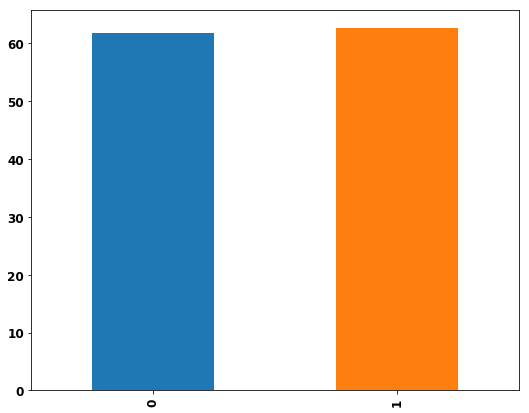

In [22]:
# distribution of 
df_time[df_time['Gender']=='female']['g_total_time'].mode().plot(kind='bar')

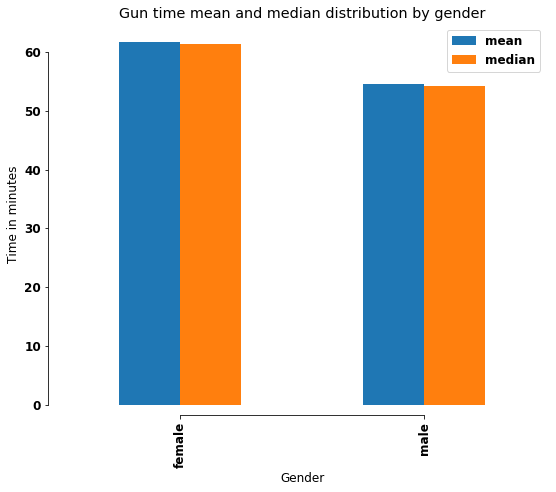

In [23]:
# statistical distribution of mean for G
plot1= df_time.groupby('Gender')['g_total_time'].agg([np.mean,np.median]).plot(kind='bar')
plt.rcParams['figure.figsize'] = (8.75, 7.0)
ax = plt.axes()
ax.set_title("Gun time mean and median distribution by gender")
ax.set_ylabel('Time in minutes')
ax.set_xlabel('Gender')
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
plt.show()

In [24]:
round(df_time.groupby('Gender')['g_total_time'].agg([np.mean,np.median]),2)

,mean,median
Gender,,
female,61.70,61.33
male,54.62,54.30


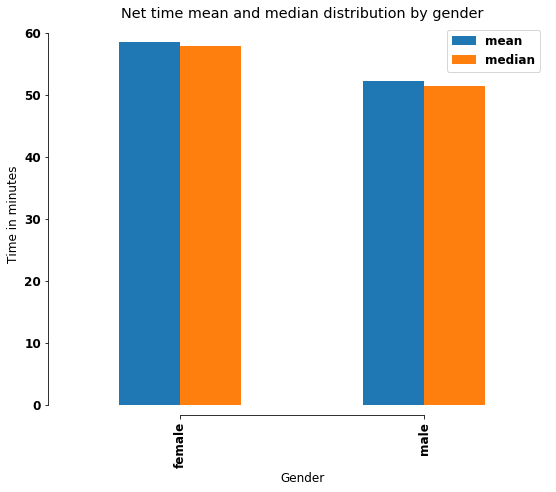

In [25]:
# statistical distribution of mean for Net Time
plot1= df_time.groupby('Gender')['n_total_time'].agg([np.mean,np.median]).plot(kind='bar')
plt.rcParams['figure.figsize'] = (8.75, 7.0)
ax = plt.axes()
ax.set_title("Net time mean and median distribution by gender")
ax.set_ylabel('Time in minutes')
ax.set_xlabel('Gender')
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
plt.show()

In [26]:
round(df_time.groupby('Gender')['n_total_time'].agg([np.mean,np.median]),2)

,mean,median
Gender,,
female,58.45,57.82
male,52.12,51.37


In [27]:
round(df_time.groupby('Gender')['g_total_time'].agg([np.mean,np.median]),2)

,mean,median
Gender,,
female,61.70,61.33
male,54.62,54.30


In [28]:
round(df_time[(df_time['Gender']=='male')&(df_time['g_total_time']<=61.70)].shape[0]/df_time.shape[0],2)

0.41

In [29]:
round(df_time[(df_time['Gender']=='male')&(df_time['n_total_time']<=58.45)].shape[0]/df_time.shape[0],2)

0.42

In [30]:
round(df_time[(df_time['Gender']=='female')&(df_time['g_total_time']<=54.62)].shape[0]/df_time.shape[0],2)

0.11

In [31]:
round(df_time[(df_time['Gender']=='female')&(df_time['n_total_time']<=52.12)].shape[0]/df_time.shape[0],2)

0.12

In [32]:
df_time.to_pickle('time.pkl')